In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
d=pd.read_csv("House_Rent_Dataset.csv")
d

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
df1=d.drop("Posted On",axis=1)

In [4]:
df2=df1.drop("Area Locality",axis=1)

In [5]:
df3=df2.drop("Furnishing Status",axis=1)

In [6]:
df4=df3.drop("Point of Contact",axis=1)

In [7]:
df=df4.drop("Floor",axis=1)

In [8]:
df

,BHK,Rent,Size,Area Type,City,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Bachelors,1
...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Bachelors/Family,2
4742,3,29000,2000,Super Area,Hyderabad,Bachelors/Family,3
4743,3,35000,1750,Carpet Area,Hyderabad,Bachelors/Family,3
4744,3,45000,1500,Carpet Area,Hyderabad,Family,2


In [9]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Tenant Preferred',
       'Bathroom'],
      dtype='object')

In [10]:
df.isnull().sum()

BHK                 0
Rent                0
Size                0
Area Type           0
City                0
Tenant Preferred    0
Bathroom            0
dtype: int64

<Axes: >

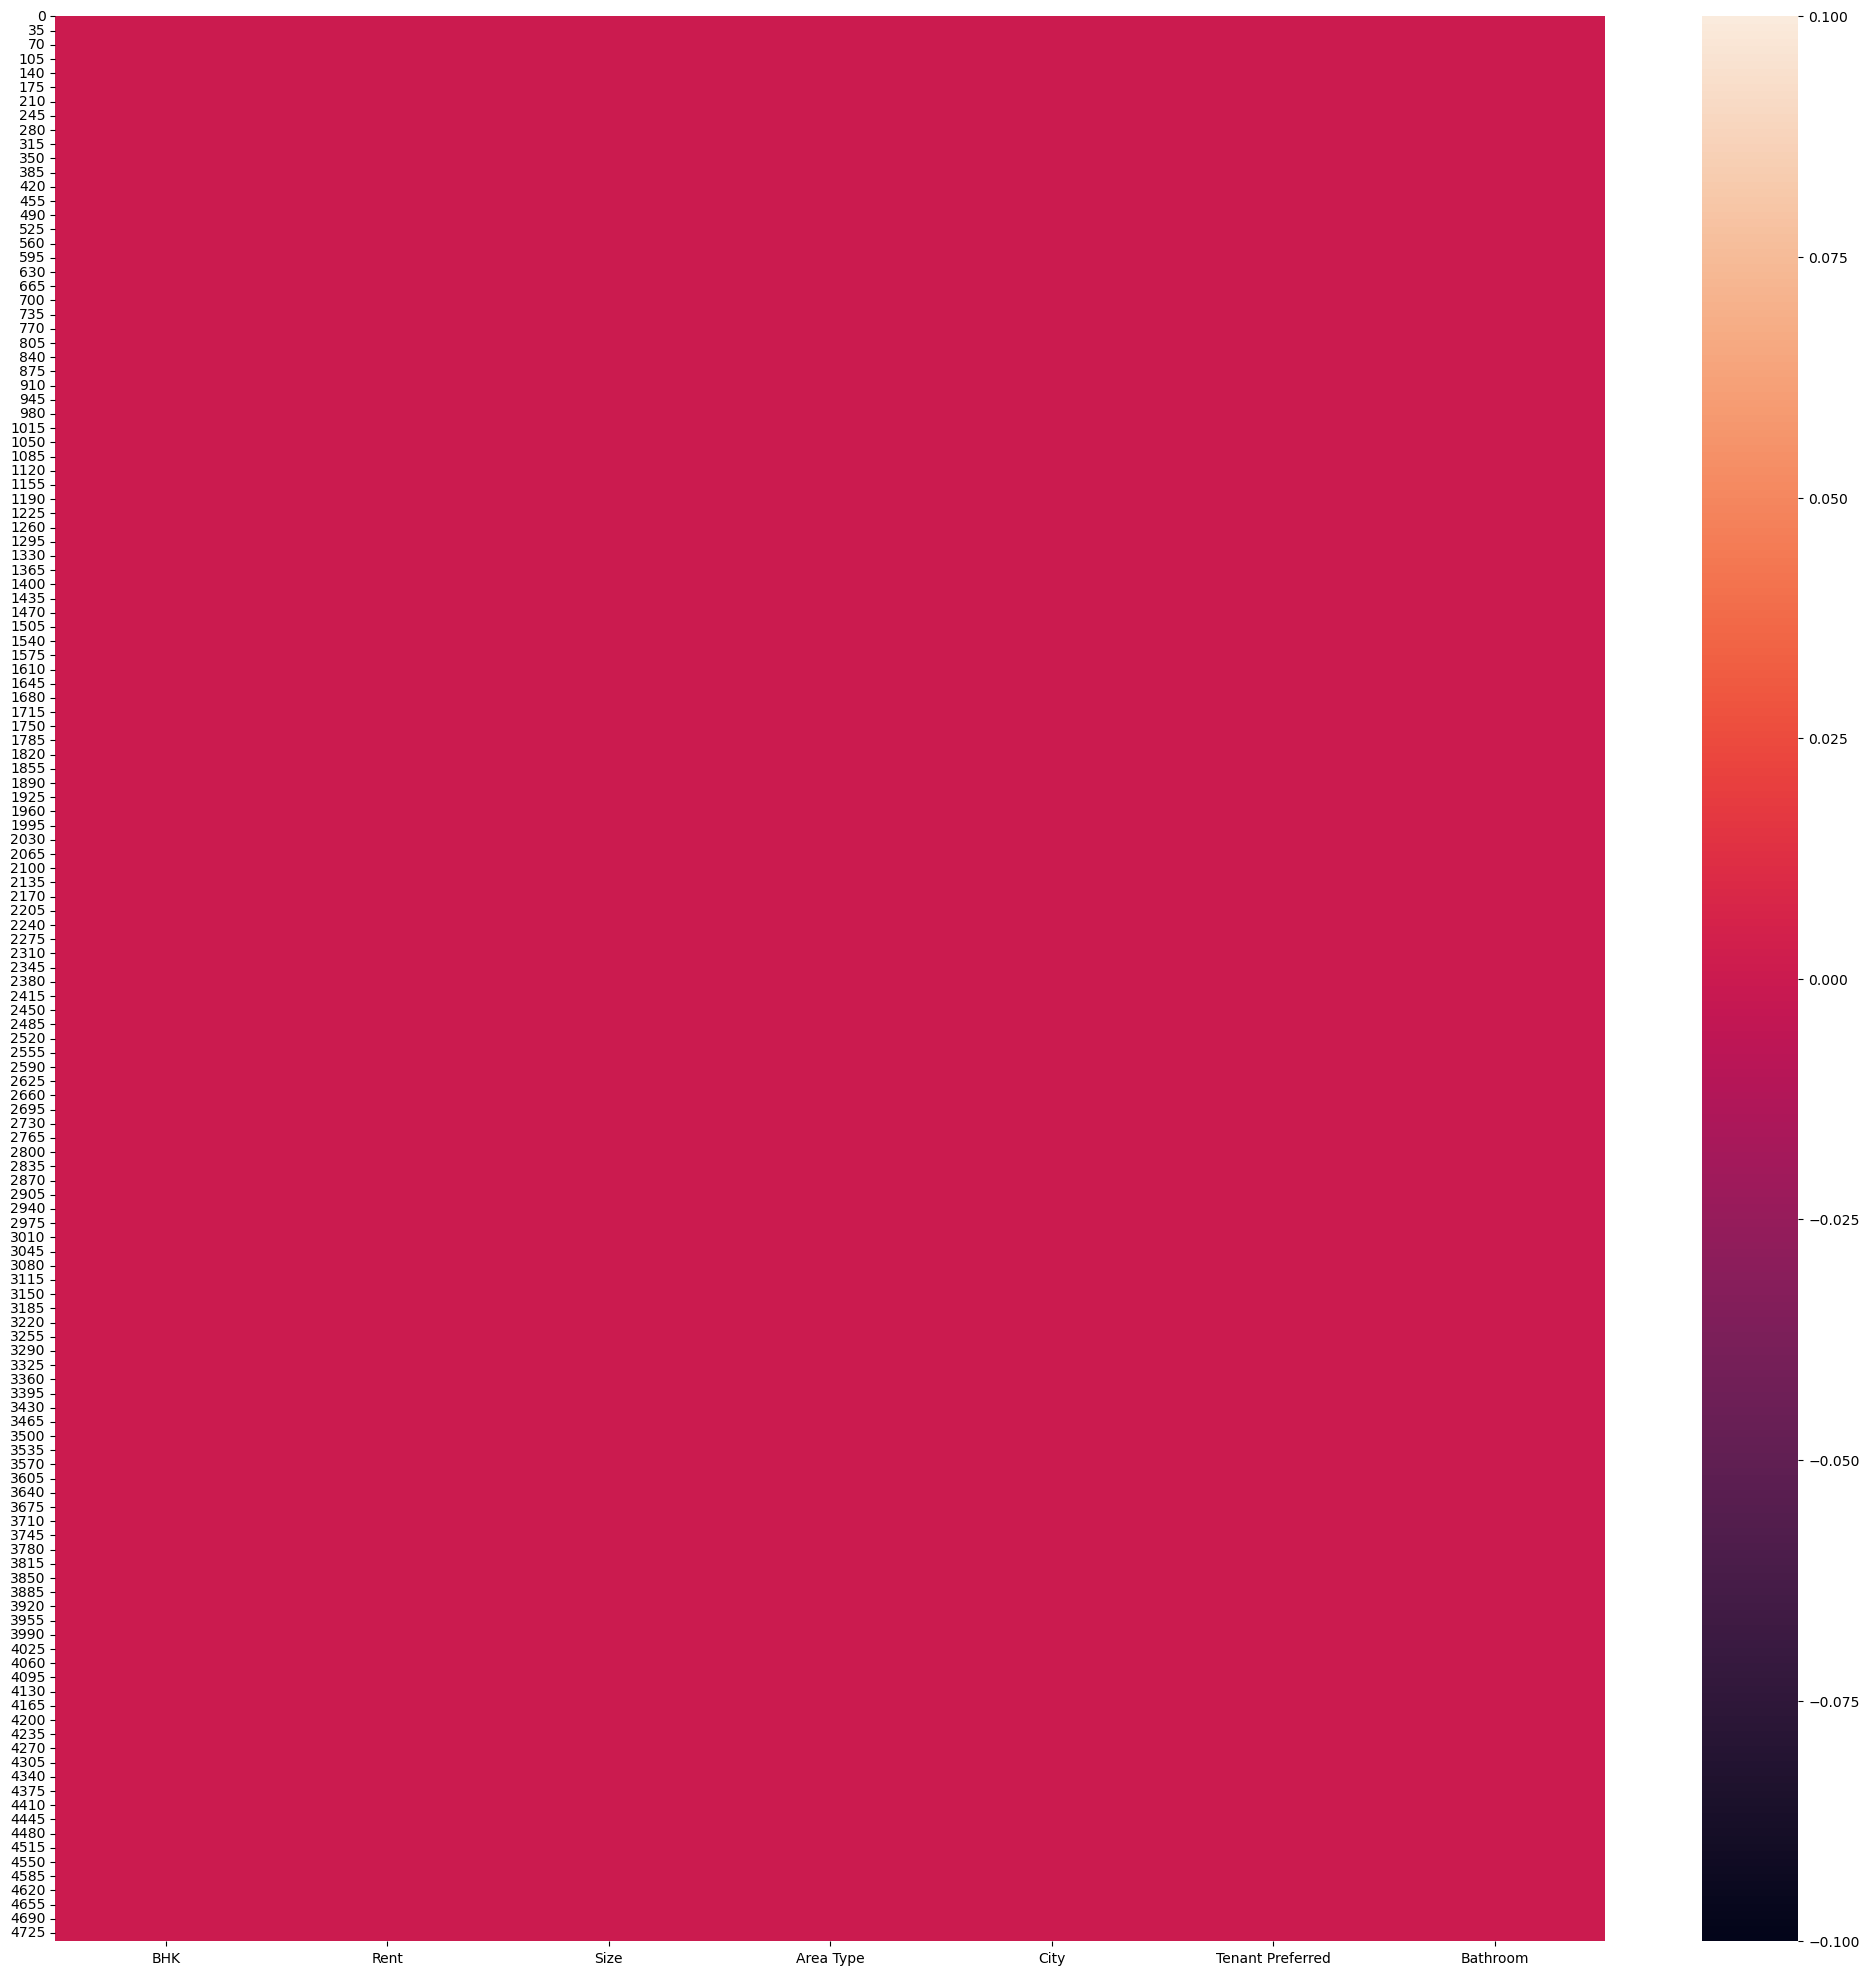

In [11]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

# Plot graph

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\3699133829.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], hue=df['Area Type'], ci=None)


Text(0, 0.5, 'Rent')

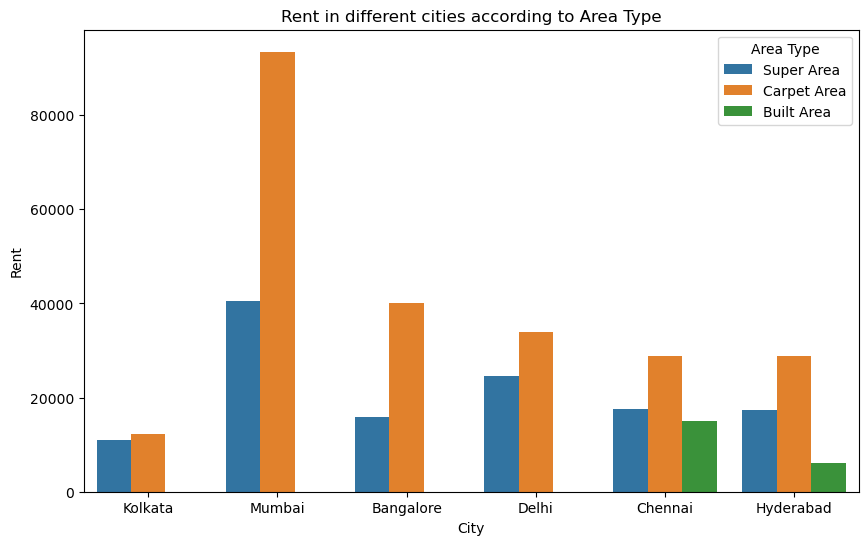

In [12]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Rent in different cities according to Area Type")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df['City'], y=df['Rent'], hue=df['Area Type'], ci=None)

# Add label for vertical axis
plt.ylabel("Rent")

# Use one_hot encoding on Area type, City, Tenant Preferred

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
df11=df[['Area Type']]
df11.head()

,Area Type
0,Super Area
1,Super Area
2,Super Area
3,Super Area
4,Carpet Area


In [15]:
oh_enc = OneHotEncoder(sparse=False,)
oh_enc_arr = oh_enc.fit_transform(df11[['Area Type']])
oh_enc_arr

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [16]:
dummy_df=pd.get_dummies(df11[['Area Type']])
dummy_df.head(4)

,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True


In [17]:
oh_enc = OneHotEncoder(sparse=False,drop='first')
oh_enc_arr = oh_enc.fit_transform(df11[['Area Type']])
oh_enc_arr

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [18]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=['Area Type_Carpet Area','Area Type_Super Area'] ,)

oh_enc_df

,Area Type_Carpet Area,Area Type_Super Area
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
4741,1.0,0.0
4742,0.0,1.0
4743,1.0,0.0
4744,1.0,0.0


In [19]:
df11['Area Type_Carpet Area'] = oh_enc_df[['Area Type_Super Area']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\2525033684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Area Type_Carpet Area'] = oh_enc_df[['Area Type_Super Area']].copy()


In [20]:
df11['Area Type'] = oh_enc_df[['Area Type_Carpet Area']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\2161548328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Area Type'] = oh_enc_df[['Area Type_Carpet Area']].copy()


In [21]:
df11

,Area Type,Area Type_Carpet Area
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
4741,1.0,0.0
4742,0.0,1.0
4743,1.0,0.0
4744,1.0,0.0


In [22]:
df.update(df11)
df.head()

,BHK,Rent,Size,Area Type,City,Tenant Preferred,Bathroom
0,2,10000,1100,0.0,Kolkata,Bachelors/Family,2
1,2,20000,800,0.0,Kolkata,Bachelors/Family,1
2,2,17000,1000,0.0,Kolkata,Bachelors/Family,1
3,2,10000,800,0.0,Kolkata,Bachelors/Family,1
4,2,7500,850,1.0,Kolkata,Bachelors,1


In [23]:
df12=df[['City']]
df12.head()

,City
0,Kolkata
1,Kolkata
2,Kolkata
3,Kolkata
4,Kolkata


In [24]:
oh_enc = OneHotEncoder(sparse=False,)
oh_enc_arr = oh_enc.fit_transform(df12[['City']])

oh_enc_arr

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [25]:
dummy_df=pd.get_dummies(df12[['City']])
dummy_df.head(4)

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False


In [26]:
oh_enc = OneHotEncoder(sparse=False,drop='first')
oh_enc_arr = oh_enc.fit_transform(df12[['City']])
oh_enc_arr

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [27]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=['City_Chennai','City_Delhi','City_Hyderabad','City_Kolkata','City_Mumbai'] ,)

oh_enc_df

,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
4741,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,1.0,0.0,0.0


In [28]:
df12['City_Chennai'] = oh_enc_df[['City_Delhi']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\1791936221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['City_Chennai'] = oh_enc_df[['City_Delhi']].copy()


In [29]:
df12['City_Chennai'] = oh_enc_df[['City_Hyderabad']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\919910782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['City_Chennai'] = oh_enc_df[['City_Hyderabad']].copy()


In [30]:
df12['City_Chennai'] = oh_enc_df[['City_Kolkata']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\2695443643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['City_Chennai'] = oh_enc_df[['City_Kolkata']].copy()


In [31]:
df12['City_Chennai'] = oh_enc_df[['City_Mumbai']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\3507418504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['City_Chennai'] = oh_enc_df[['City_Mumbai']].copy()


In [32]:
df12['City'] = oh_enc_df[['City_Mumbai']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\3810058971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['City'] = oh_enc_df[['City_Mumbai']].copy()


In [33]:
df12

,City,City_Chennai
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
4741,0.0,0.0
4742,0.0,0.0
4743,0.0,0.0
4744,0.0,0.0


In [34]:
df.update(df12)
df.head()

,BHK,Rent,Size,Area Type,City,Tenant Preferred,Bathroom
0,2,10000,1100,0.0,0.0,Bachelors/Family,2
1,2,20000,800,0.0,0.0,Bachelors/Family,1
2,2,17000,1000,0.0,0.0,Bachelors/Family,1
3,2,10000,800,0.0,0.0,Bachelors/Family,1
4,2,7500,850,1.0,0.0,Bachelors,1


In [35]:
df13=df[['Tenant Preferred']]
df13.head()

,Tenant Preferred
0,Bachelors/Family
1,Bachelors/Family
2,Bachelors/Family
3,Bachelors/Family
4,Bachelors


In [36]:
oh_enc = OneHotEncoder(sparse=False,)
oh_enc_arr = oh_enc.fit_transform(df13[['Tenant Preferred']])

oh_enc_arr

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [37]:
dummy_df=pd.get_dummies(df13[['Tenant Preferred']])
dummy_df.head(4)

,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False


In [38]:
oh_enc = OneHotEncoder(sparse=False,drop='first')
oh_enc_arr = oh_enc.fit_transform(df1[['Tenant Preferred']])
oh_enc_arr

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 0.]])

In [39]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=['Tenant Preferred_Bachelors/Family','Tenant Preferred_Family'] ,)

oh_enc_df

,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
4741,1.0,0.0
4742,1.0,0.0
4743,1.0,0.0
4744,0.0,1.0


In [40]:
df13['Tenant Preferred_Bachelors/Family'] = oh_enc_df[['Tenant Preferred_Family']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\3790718549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['Tenant Preferred_Bachelors/Family'] = oh_enc_df[['Tenant Preferred_Family']].copy()


In [41]:
df13['Tenant Preferred'] = oh_enc_df[['Tenant Preferred_Bachelors/Family']].copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18376\369208165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['Tenant Preferred'] = oh_enc_df[['Tenant Preferred_Bachelors/Family']].copy()


In [42]:
df.update(df13)
df.head()

,BHK,Rent,Size,Area Type,City,Tenant Preferred,Bathroom
0,2,10000,1100,0.0,0.0,1.0,2
1,2,20000,800,0.0,0.0,1.0,1
2,2,17000,1000,0.0,0.0,1.0,1
3,2,10000,800,0.0,0.0,1.0,1
4,2,7500,850,1.0,0.0,0.0,1


In [43]:
df

,BHK,Rent,Size,Area Type,City,Tenant Preferred,Bathroom
0,2,10000,1100,0.0,0.0,1.0,2
1,2,20000,800,0.0,0.0,1.0,1
2,2,17000,1000,0.0,0.0,1.0,1
3,2,10000,800,0.0,0.0,1.0,1
4,2,7500,850,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...
4741,2,15000,1000,1.0,0.0,1.0,2
4742,3,29000,2000,0.0,0.0,1.0,3
4743,3,35000,1750,1.0,0.0,1.0,3
4744,3,45000,1500,1.0,0.0,0.0,2


In [44]:
x=df.drop("Rent",axis=1)
y=df["Rent"]
print("Shape of x",x.shape)
print("Shape of y",y.shape)

Shape of x (4746, 6)
Shape of y (4746,)


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=51)
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (3796, 6)
Shape of y_train =  (3796,)
Shape of X_test =  (950, 6)
Shape of y_test =  (950,)


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [47]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

# using LinearRegression

In [48]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x,y)

LinearRegression()

In [49]:
lr.coef_

array([4.08101599e+03, 3.83841141e+01, 9.63125492e+03, 5.81854289e+04,
       4.13440556e+03, 9.87789180e+03])

In [50]:
lr.intercept_

-49645.927274808295

In [51]:
y_pred=(x_test)

In [52]:
lr.score(x_test,y_test)

0.4203980245139377

# using DecisionTreeRegressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
regressor = DecisionTreeRegressor(criterion='squared_error')
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
y_test

3435    10000
1696    10000
1262    38000
3002    14000
823     93000
        ...  
1129    50000
4552    11000
3885    14000
3782     7500
2283    11500
Name: Rent, Length: 950, dtype: int64

In [56]:
regressor.score(x_test,y_test)

0.6323595154310389

# using RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
Regressor=RandomForestRegressor(criterion="squared_error")
Regressor.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
y_test

3435    10000
1696    10000
1262    38000
3002    14000
823     93000
        ...  
1129    50000
4552    11000
3885    14000
3782     7500
2283    11500
Name: Rent, Length: 950, dtype: int64

In [60]:
Regressor.score(x_test,y_test)

0.6612799546966948

# using LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred=model.predict(x_test)

In [63]:
model.score(x_test,y_test)

0.05578947368421053

# using svr

In [64]:
from sklearn.svm import SVR

In [65]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)
svr_rbf.score(x_test, y_test)

-0.05801732244816771

In [67]:
svr_linear=SVR(kernel='linear')
svr_linear.fit(x_train, y_train)
svr_linear.score(x_test, y_test)

0.10119978471571112

In [68]:
svr_linear=SVR(kernel='poly')
svr_linear.fit(x_train, y_train)
svr_linear.score(x_test, y_test)

0.12508178035156892

# using KNeighborsRegressor

In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
regressor = KNeighborsRegressor(n_neighbors=9)
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [72]:
sc.fit(x_train)

StandardScaler()

In [73]:
regressor.score(x_test,y_test)

0.23403798450883107

# using k fold

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
score_lr=cross_val_score(KNeighborsRegressor(n_neighbors=5), x,y,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[ 0.05997338  0.11104307 -3.13609961]
Avg : -0.9883610523874524


In [76]:
score_lr1=cross_val_score(KNeighborsRegressor(n_neighbors=9), x,y,cv=3)
print(score_lr1)
print("Avg :",np.average(score_lr1))

[ 0.093832    0.13953418 -2.27949378]
Avg : -0.6820425329458626


In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [78]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 25309.188421052633


In [79]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 6383369440.449473


In [80]:
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 79895.99139161785


In [81]:
print("R_Squared",r2_score(y_test,y_pred))

R_Squared -0.06658972594237866


# k fold on RandomForestRegressor

In [82]:
score_rf=cross_val_score(RandomForestRegressor(n_estimators=100),x_train,y_train,cv=3)
print(score_rf)
print("Avg:",np.average(score_rf))

[0.6218349  0.68490133 0.21233664]
Avg: 0.506357625695506


In [83]:
score_rf2=cross_val_score(RandomForestRegressor(n_estimators=100),x_train,y_train,cv=3)
print(score_rf2)
print("Avg:",np.average(score_rf2))

[0.65144228 0.68570655 0.20931807]
Avg: 0.5154889655133473
